In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
plt.style.use('ggplot')
import datetime

In [127]:
train = pd.read_excel('2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx',header = 1) 
test = pd.read_excel('2020 빅콘테스트 데이터분석분야-챔피언리그_2020년 6월 판매실적예측데이터(평가데이터).xlsx',header = 1)
view = pd.read_excel('2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx',header = 1)
view_raw = view.drop(view.index[-1]).copy()
holiday = pd.read_excel('holiday.xls',header = 0)#http://marketdata.krx.co.kr/mdi#document=01100305

## 기본 데이터 전처리
- 판매량
- 공휴일
- 노출(분) 처리

In [128]:
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


판매량

In [129]:
train['판매량'] = round(train['취급액'] / train['판매단가'],0)
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0


휴일

In [130]:
holiday['일자 및 요일'] = holiday['일자 및 요일'].apply(lambda x:pd.to_datetime(x))


holi = []
for i in holiday['일자 및 요일']:
    month = i.month
    day = i.day
    holi.append(str(month)+str(day))
    
train['holi'] = train['방송일시'].apply(lambda x: str(x.month)+str(x.day))

train['holiday'] = train['holi'].isin(holi)

train.drop('holi',axis=1,inplace=True)
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True


노출(분)

In [131]:
train['노출(분)'] = train.groupby(['방송일시'])['노출(분)'].ffill()
train.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True


## 날씨 데이터 병합

In [132]:
#train['날짜'] = train['방송일시'].dt.date
#train.head()
#train['방송일시'] = train['방송일시'].dt.strftime('%Y-%m-%d %I:%M')
#train.head()

날씨 데이터

In [133]:
wea = pd.read_csv('weather_2019_서울.csv', encoding='cp949') 
wea.head()

,일시,기온(°C),누적강수량(mm),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,2019-01-01 0:01,-5.5,0.0,308.0,1.0,1024.1,1035.3,54.9,0.0,0.0
1,2019-01-01 0:02,-5.5,0.0,330.9,0.8,1024.1,1035.3,55.0,0.0,0.0
2,2019-01-01 0:03,-5.5,0.0,325.0,1.1,1024.1,1035.3,55.0,0.0,0.0
3,2019-01-01 0:04,-5.5,0.0,282.1,0.8,1024.1,1035.3,55.2,0.0,0.0
4,2019-01-01 0:05,-5.5,0.0,301.6,0.8,1024.0,1035.2,55.6,0.0,0.0


In [134]:
wea.columns = ['일시', '기온', '누적강수량', '풍향', '풍속', '현지기압', '해면기압', '습도', '일사', '일조']
wea.head()

,일시,기온,누적강수량,풍향,풍속,현지기압,해면기압,습도,일사,일조
0,2019-01-01 0:01,-5.5,0.0,308.0,1.0,1024.1,1035.3,54.9,0.0,0.0
1,2019-01-01 0:02,-5.5,0.0,330.9,0.8,1024.1,1035.3,55.0,0.0,0.0
2,2019-01-01 0:03,-5.5,0.0,325.0,1.1,1024.1,1035.3,55.0,0.0,0.0
3,2019-01-01 0:04,-5.5,0.0,282.1,0.8,1024.1,1035.3,55.2,0.0,0.0
4,2019-01-01 0:05,-5.5,0.0,301.6,0.8,1024.0,1035.2,55.6,0.0,0.0


In [135]:
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525597 entries, 0 to 525596
Data columns (total 10 columns):
일시       525597 non-null object
기온       525135 non-null float64
누적강수량    519049 non-null float64
풍향       523660 non-null float64
풍속       523660 non-null float64
현지기압     525246 non-null float64
해면기압     525246 non-null float64
습도       525246 non-null float64
일사       524864 non-null float64
일조       525246 non-null float64
dtypes: float64(9), object(1)
memory usage: 40.1+ MB


In [136]:
wea['일시'] = pd.to_datetime(wea['일시'], format='%Y-%m-%d %H:%M', errors='raise')
wea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525597 entries, 0 to 525596
Data columns (total 10 columns):
일시       525597 non-null datetime64[ns]
기온       525135 non-null float64
누적강수량    519049 non-null float64
풍향       523660 non-null float64
풍속       523660 non-null float64
현지기압     525246 non-null float64
해면기압     525246 non-null float64
습도       525246 non-null float64
일사       524864 non-null float64
일조       525246 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 40.1 MB


In [137]:
train1 = train
wea1 = wea

train1.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True


In [138]:
#train1['방송일시'] = train1['방송일시'].astype(str)
#wea1['일시'] = wea1['일시'].astype(str)

mer = pd.merge(train1, wea1, left_on='방송일시', right_on='일시', how = 'left')
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,일시,기온,누적강수량,풍향,풍속,현지기압,해면기압,습도,일사,일조
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,2019-01-01 06:00:00,-7.9,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,2019-01-01 06:00:00,-7.9,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,2019-01-01 06:20:00,-8.1,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,2019-01-01 06:20:00,-8.1,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,2019-01-01 06:40:00,-7.7,0.0,327.5,1.6,1023.3,1034.6,56.8,0.0,0.0


In [139]:
mer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38309 entries, 0 to 38308
Data columns (total 20 columns):
방송일시       38309 non-null datetime64[ns]
노출(분)      38309 non-null float64
마더코드       38309 non-null int64
상품코드       38309 non-null int64
상품명        38309 non-null object
상품군        38309 non-null object
판매단가       38309 non-null int64
취급액        37372 non-null float64
판매량        37372 non-null float64
holiday    38309 non-null bool
일시         38304 non-null datetime64[ns]
기온         38281 non-null float64
누적강수량      37695 non-null float64
풍향         38154 non-null float64
풍속         38154 non-null float64
현지기압       38281 non-null float64
해면기압       38281 non-null float64
습도         38281 non-null float64
일사         38255 non-null float64
일조         38281 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(12), int64(3), object(2)
memory usage: 5.9+ MB


In [140]:
mer.drop('일시', axis = 1, inplace = True)
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,기온,누적강수량,풍향,풍속,현지기압,해면기압,습도,일사,일조
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,-7.9,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,-7.9,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,-8.1,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,-8.1,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,-7.7,0.0,327.5,1.6,1023.3,1034.6,56.8,0.0,0.0


# eda

In [141]:
import matplotlib.pylab as plt
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### (1). 시간별로 확인

#### 1. 분기별 매출액/판매량

In [142]:
mer['분기'] = mer.방송일시.dt.quarter
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,기온,누적강수량,풍향,풍속,현지기압,해면기압,습도,일사,일조,분기
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,-7.9,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,-7.9,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,-8.1,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,-8.1,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,-7.7,0.0,327.5,1.6,1023.3,1034.6,56.8,0.0,0.0,1


   분기        분기매출액합
0   1  1.931530e+11
1   2  1.960520e+11
2   3  2.055258e+11
3   4  2.227090e+11


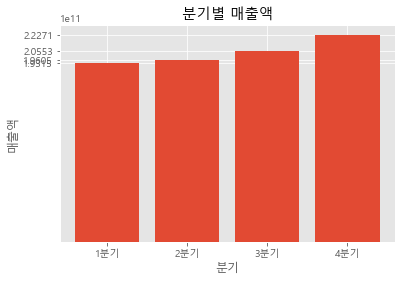

In [143]:
eda1 = mer.groupby('분기')['취급액'].agg([('분기매출액합','sum')]).reset_index()
print(eda1)

plt.title("분기별 매출액")
plt.bar(eda1['분기'], eda1['분기매출액합'])
plt.xticks(eda1['분기'], ['1분기', '2분기', '3분기', '4분기'])
plt.yticks(sorted(eda1['분기매출액합']))
plt.xlabel("분기")
plt.ylabel("매출액")
plt.show()

   분기   rate
0   1  23.63
1   2  23.98
2   3  25.14
3   4  27.24


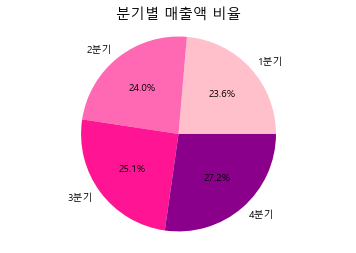

In [144]:
eda1_rate = pd.DataFrame()
eda1_rate['분기'] = eda1['분기']
eda1_rate['rate'] = round(eda1['분기매출액합'] / sum(eda1['분기매출액합']) * 100,2)
print(eda1_rate)

plt.title('분기별 매출액 비율')
plt.pie(eda1_rate['rate'], 
        labels=['1분기', '2분기', '3분기', '4분기'],
       autopct="%1.1f%%",
       colors = ['pink','hotpink',  'deeppink','darkmagenta'])
plt.axis('equal')
plt.show()

   분기     분기판매량합
0   1  2510775.0
1   2  2505231.0
2   3  2971295.0
3   4  3149938.0


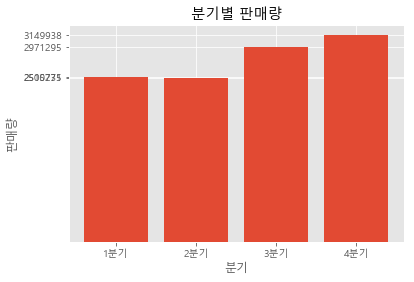

In [145]:
eda1 = mer.groupby('분기')['판매량'].agg([('분기판매량합','sum')]).reset_index()
print(eda1)

plt.title("분기별 판매량")
plt.bar(eda1['분기'], eda1['분기판매량합'])
plt.xticks(eda1['분기'], ['1분기', '2분기', '3분기', '4분기'])
plt.yticks(sorted(eda1['분기판매량합']))
plt.xlabel("분기")
plt.ylabel("판매량")
plt.show()

   분기   rate
0   1  22.54
1   2  22.49
2   3  26.68
3   4  28.28


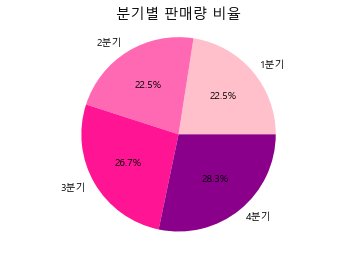

In [146]:
eda1_rate = pd.DataFrame()
eda1_rate['분기'] = eda1['분기']
eda1_rate['rate'] = round(eda1['분기판매량합'] / sum(eda1['분기판매량합']) * 100,2)
print(eda1_rate)

plt.title('분기별 판매량 비율')
plt.pie(eda1_rate['rate'], 
        labels=['1분기', '2분기', '3분기', '4분기'],
       autopct="%1.1f%%",
       colors = ['pink','hotpink',  'deeppink','darkmagenta'])
plt.axis('equal')
plt.show()

#### 2. 월별 상품군 매출액/판매량

In [147]:
mer['월'] = mer.방송일시.dt.month
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,누적강수량,풍향,풍속,현지기압,해면기압,습도,일사,일조,분기,월
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,0.0,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,0.0,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,0.0,327.5,1.6,1023.3,1034.6,56.8,0.0,0.0,1,1


In [148]:
df = pd.crosstab(mer['월'], mer['상품군'], values=mer['취급액'], aggfunc=np.sum).fillna(0)
df.head()

상품군,가구,가전,건강기능,농수축,무형,생활용품,속옷,의류,이미용,잡화,주방,침구
월,,,,,,,,,,,,
1,0.000000e+00,7.443582e+09,1.208088e+09,2.053628e+10,0.0,2.561073e+09,1.049655e+10,8.508143e+09,3.456610e+09,1.887322e+09,1.282966e+10,0.0
2,2.734551e+09,9.637182e+09,1.136406e+09,1.201721e+10,0.0,3.123247e+09,6.631456e+09,6.320186e+09,2.982287e+09,3.810956e+09,1.119485e+10,0.0
3,3.160337e+09,9.185087e+09,1.463361e+09,7.583698e+09,0.0,5.324272e+09,1.018290e+10,1.113156e+10,1.935054e+09,5.304263e+09,9.366818e+09,0.0
4,3.149639e+09,1.029206e+10,7.976930e+08,6.923465e+09,0.0,2.575729e+09,9.043216e+09,9.564433e+09,2.300892e+09,3.531384e+09,1.238186e+10,232539000.0
5,2.793887e+09,1.254701e+10,1.106787e+09,9.772354e+09,0.0,1.936612e+09,1.110494e+10,1.132289e+10,2.287170e+09,6.343167e+09,8.772368e+09,926842000.0


In [149]:
df.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
df

상품군,가구,가전,건강기능,농수축,무형,생활용품,속옷,의류,이미용,잡화,주방,침구
1월,0.000000e+00,7.443582e+09,1.208088e+09,2.053628e+10,0.0,2.561073e+09,1.049655e+10,8.508143e+09,3.456610e+09,1.887322e+09,1.282966e+10,0.000000e+00
2월,2.734551e+09,9.637182e+09,1.136406e+09,1.201721e+10,0.0,3.123247e+09,6.631456e+09,6.320186e+09,2.982287e+09,3.810956e+09,1.119485e+10,0.000000e+00
3월,3.160337e+09,9.185087e+09,1.463361e+09,7.583698e+09,0.0,5.324272e+09,1.018290e+10,1.113156e+10,1.935054e+09,5.304263e+09,9.366818e+09,0.000000e+00
4월,3.149639e+09,1.029206e+10,7.976930e+08,6.923465e+09,0.0,2.575729e+09,9.043216e+09,9.564433e+09,2.300892e+09,3.531384e+09,1.238186e+10,2.325390e+08
5월,2.793887e+09,1.254701e+10,1.106787e+09,9.772354e+09,0.0,1.936612e+09,1.110494e+10,1.132289e+10,2.287170e+09,6.343167e+09,8.772368e+09,9.268420e+08
6월,2.777056e+09,6.147901e+09,2.747047e+09,9.212766e+09,0.0,1.681650e+09,1.387210e+10,1.079362e+10,2.183696e+09,4.185127e+09,1.040034e+10,2.343745e+09
7월,2.411248e+09,7.773842e+09,1.917653e+09,1.442284e+10,0.0,2.279325e+09,9.103370e+09,7.997335e+09,3.179406e+09,6.892725e+09,1.099400e+10,2.054010e+09
8월,2.576131e+09,7.102425e+09,9.936400e+08,2.098538e+10,0.0,3.919849e+09,8.444648e+09,7.519910e+09,2.071920e+09,5.809821e+09,9.461386e+09,1.385900e+08
9월,3.026932e+09,5.534816e+09,1.875243e+09,1.873170e+10,0.0,4.126727e+09,3.541833e+09,7.032600e+09,4.824076e+09,8.777813e+09,9.867296e+09,1.373200e+08
10월,2.947984e+09,5.142377e+09,2.502627e+09,1.592788e+10,0.0,8.752757e+09,6.659845e+09,6.520393e+09,5.456908e+09,6.388970e+09,8.106195e+09,4.425930e+08


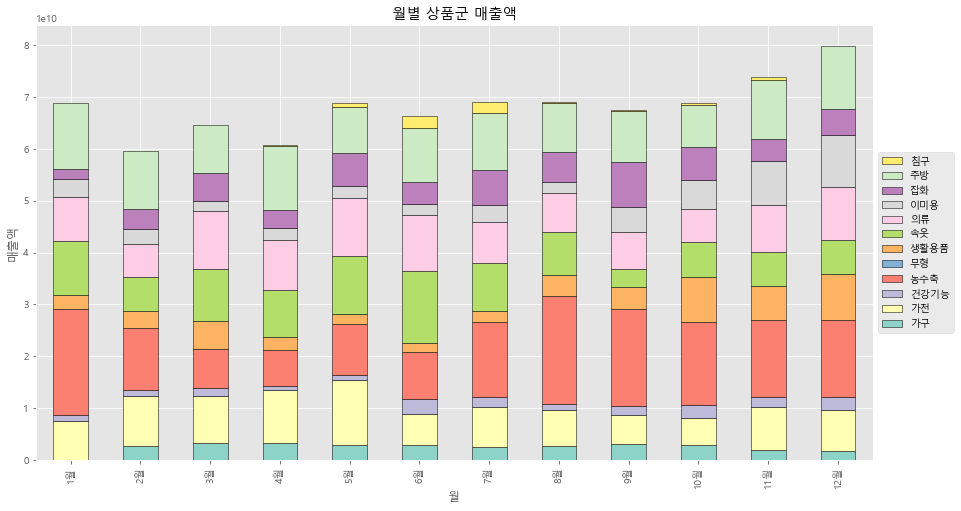

In [150]:
plt.rcParams["figure.figsize"] = (15, 8)

ax = df.plot.bar(stacked=True, 
            color = sns.color_palette("Set3", len(df)), 
            edgecolor = 'black') # 테두리 추가

# legend revese code
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5)) 

plt.title("월별 상품군 매출액")
plt.xlabel("월")
plt.ylabel("매출액")
plt.show()

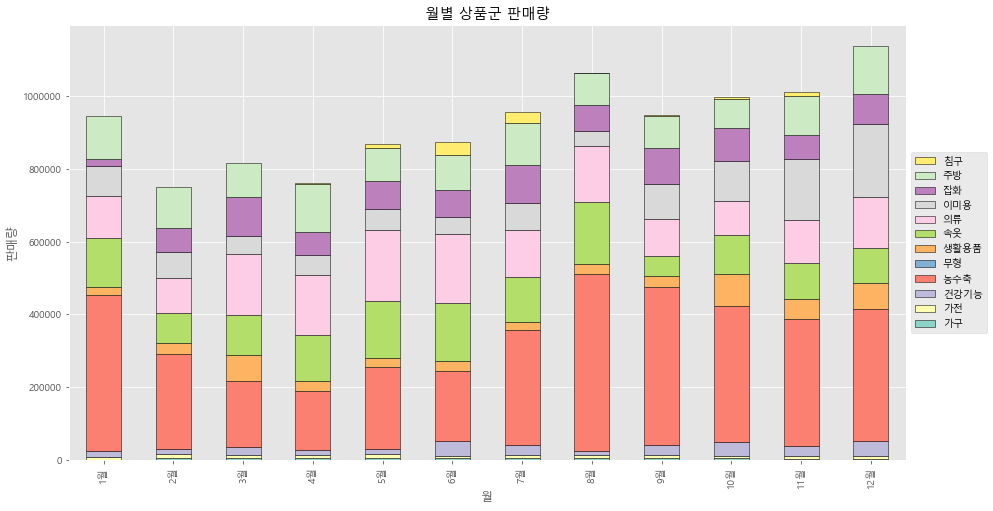

In [151]:
## 데이터프레임
df1 = pd.crosstab(mer['월'], mer['상품군'], values=mer['판매량'], aggfunc=np.sum).fillna(0)
df1.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

## 그래프
plt.rcParams["figure.figsize"] = (15, 8)
ax = df1.plot.bar(stacked=True, 
             color = sns.color_palette("Set3", len(df)),
            edgecolor = 'black')

# legend revese code
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1, 0.5)) 

plt.title("월별 상품군 판매량")
plt.xlabel("월")
plt.ylabel("판매량")
plt.show()

In [152]:
df.head()

상품군,가구,가전,건강기능,농수축,무형,생활용품,속옷,의류,이미용,잡화,주방,침구
1월,0.000000e+00,7.443582e+09,1.208088e+09,2.053628e+10,0.0,2.561073e+09,1.049655e+10,8.508143e+09,3.456610e+09,1.887322e+09,1.282966e+10,0.0
2월,2.734551e+09,9.637182e+09,1.136406e+09,1.201721e+10,0.0,3.123247e+09,6.631456e+09,6.320186e+09,2.982287e+09,3.810956e+09,1.119485e+10,0.0
3월,3.160337e+09,9.185087e+09,1.463361e+09,7.583698e+09,0.0,5.324272e+09,1.018290e+10,1.113156e+10,1.935054e+09,5.304263e+09,9.366818e+09,0.0
4월,3.149639e+09,1.029206e+10,7.976930e+08,6.923465e+09,0.0,2.575729e+09,9.043216e+09,9.564433e+09,2.300892e+09,3.531384e+09,1.238186e+10,232539000.0
5월,2.793887e+09,1.254701e+10,1.106787e+09,9.772354e+09,0.0,1.936612e+09,1.110494e+10,1.132289e+10,2.287170e+09,6.343167e+09,8.772368e+09,926842000.0


* 농수축
 - 판매량 압도적(매출액도 높긴 하지만, 단가가 낮기 때문에 월등히 높진 않음)
 - 1월, 8월에 판매량 많음(설날/추석 대비?)

* 의류, 속옷
 - 판매량도 많고 매출액도 높은 편
 
* 주방
 - 은근 잘팔림

#### 3. 월별 상품군 정렬

판매량

In [153]:
mer.groupby('상품군')['취급액'].agg([('sum', 'sum')]).sort_values('sum', ascending=False).reset_index()

,상품군,sum
0,농수축,1.659422e+11
1,주방,1.268624e+11
2,의류,1.058036e+11
3,속옷,1.021969e+11
4,가전,9.712672e+10
5,잡화,6.229553e+10
6,생활용품,5.164739e+10
7,이미용,4.932262e+10
8,가구,2.914674e+10
9,건강기능,2.010382e+10


In [154]:
df2 = pd.pivot_table(mer, values='취급액', 
                      index='월', 
                      columns='상품군', 
                      aggfunc='sum', 
                      fill_value=0).reset_index()
df2.columns.name = None
df2.head()

,월,가구,가전,건강기능,농수축,무형,생활용품,속옷,의류,이미용,잡화,주방,침구
0,1,0,7443582000,1208088000,20536278000,0,2561073000,10496548000,8508143000,3456610000,1887322000,12829657000,0
1,2,2734551000,9637182000,1136406000,12017213000,0,3123247000,6631456000,6320186000,2982287000,3810956000,11194847000,0
2,3,3160337000,9185087000,1463361000,7583698000,0,5324272000,10182903000,11131557000,1935054000,5304263000,9366818000,0
3,4,3149639000,10292062000,797693000,6923465000,0,2575729000,9043216000,9564433000,2300892000,3531384000,12381865000,232539000
4,5,2793887000,12547009000,1106787000,9772354000,0,1936612000,11104945000,11322887000,2287170000,6343167000,8772368000,926842000


In [155]:
df22 = df2.iloc[:,1:].apply(lambda x: pd.Series(x.sort_values(ascending = False).index, 
                                         index = ['top1', 'top2','top3','top4','top5','top6','top7','top8','top9','top10','top11','top12',]), 
                     axis = 1)
df22.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
print('월별 매출액 top 상품군')
df22

월별 매출액 top 상품군


,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12
1월,농수축,주방,속옷,의류,가전,이미용,생활용품,잡화,건강기능,침구,무형,가구
2월,농수축,주방,가전,속옷,의류,잡화,생활용품,이미용,가구,건강기능,침구,무형
3월,의류,속옷,주방,가전,농수축,생활용품,잡화,가구,이미용,건강기능,침구,무형
4월,주방,가전,의류,속옷,농수축,잡화,가구,생활용품,이미용,건강기능,침구,무형
5월,가전,의류,속옷,농수축,주방,잡화,가구,이미용,생활용품,건강기능,침구,무형
6월,속옷,의류,주방,농수축,가전,잡화,가구,건강기능,침구,이미용,생활용품,무형
7월,농수축,주방,속옷,의류,가전,잡화,이미용,가구,생활용품,침구,건강기능,무형
8월,농수축,주방,속옷,의류,가전,잡화,생활용품,가구,이미용,건강기능,침구,무형
9월,농수축,주방,잡화,의류,가전,이미용,생활용품,속옷,가구,건강기능,침구,무형
10월,농수축,생활용품,주방,속옷,의류,잡화,이미용,가전,가구,건강기능,침구,무형


판매량

In [156]:
mer.groupby('상품군')['판매량'].agg([('sum', 'sum')]).sort_values('sum', ascending=False).reset_index()

,상품군,sum
0,농수축,3776027.0
1,의류,1667285.0
2,속옷,1425054.0
3,주방,1252969.0
4,이미용,1046207.0
5,잡화,925192.0
6,생활용품,501525.0
7,건강기능,294475.0
8,침구,102954.0
9,가전,100073.0


In [157]:
df2 = pd.pivot_table(mer, values='판매량', 
                      index='월', 
                      columns='상품군', 
                      aggfunc='sum', 
                      fill_value=0).reset_index()
df2.columns.name = None
df2.head()

,월,가구,가전,건강기능,농수축,무형,생활용품,속옷,의류,이미용,잡화,주방,침구
0,1,0,8917,14035,430021,0,21153,135406,115850,82311,19196,117776,0
1,2,4639,10039,14702,261696,0,30487,81806,97183,70400,66653,112900,0
2,3,5195,8000,21676,181669,0,71044,112080,167984,47242,107679,93036,0
3,4,5048,8748,11844,162807,0,28659,127663,163503,54960,64880,129681,3175
4,5,4038,11731,14776,224727,0,25526,156958,195841,56204,76248,91554,12658


In [158]:
df22 = df2.iloc[:,1:].apply(lambda x: pd.Series(x.sort_values(ascending = False).index, 
                                         index = ['top1', 'top2','top3','top4','top5','top6','top7','top8','top9','top10','top11','top12',]), 
                     axis = 1)
df22.index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
print('월별 판매량 top 상품군')
df22

월별 판매량 top 상품군


,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10,top11,top12
1월,농수축,속옷,주방,의류,이미용,생활용품,잡화,건강기능,가전,침구,무형,가구
2월,농수축,주방,의류,속옷,이미용,잡화,생활용품,건강기능,가전,가구,침구,무형
3월,농수축,의류,속옷,잡화,주방,생활용품,이미용,건강기능,가전,가구,침구,무형
4월,의류,농수축,주방,속옷,잡화,이미용,생활용품,건강기능,가전,가구,침구,무형
5월,농수축,의류,속옷,주방,잡화,이미용,생활용품,건강기능,침구,가전,가구,무형
6월,농수축,의류,속옷,주방,잡화,이미용,건강기능,침구,생활용품,가전,가구,무형
7월,농수축,의류,속옷,주방,잡화,이미용,침구,건강기능,생활용품,가전,가구,무형
8월,농수축,속옷,의류,주방,잡화,이미용,생활용품,건강기능,가전,가구,침구,무형
9월,농수축,의류,잡화,이미용,주방,속옷,생활용품,건강기능,가전,가구,침구,무형
10월,농수축,이미용,속옷,의류,잡화,생활용품,주방,건강기능,침구,가전,가구,무형


### (2). 날씨별로 확인

#### 1. 비오는 날

In [159]:
mer['날짜'] = mer['방송일시'].dt.date
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,풍향,풍속,현지기압,해면기압,습도,일사,일조,분기,월,날짜
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,313.1,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,325.5,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,327.5,1.6,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01


In [160]:
mer.누적강수량.isnull().sum()

614

In [161]:
mer['누적강수량'] = mer.누적강수량.fillna(0)
mer.누적강수량.isnull().sum()

0

In [162]:
mer1 = mer.copy()
mer1['누적강수량_shift'] = mer1.누적강수량.shift(-1)
mer1.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,풍속,현지기압,해면기압,습도,일사,일조,분기,월,날짜,누적강수량_shift
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,1.6,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0


In [163]:
mer1['강수량'] = mer1['누적강수량_shift'] - mer1['누적강수량']
mer1.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,현지기압,해면기압,습도,일사,일조,분기,월,날짜,누적강수량_shift,강수량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,0.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,0.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,0.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,0.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0,0.0


In [164]:
mer1[mer1['강수량']<0] = 0
mer['강수량'] = mer1['강수량']

In [165]:
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,풍속,현지기압,해면기압,습도,일사,일조,분기,월,날짜,강수량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,1.8,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,0.6,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,1.6,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0


In [169]:
mer['강수여부(분)'] = mer['강수량'] != 0
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,현지기압,해면기압,습도,일사,일조,분기,월,날짜,강수량,강수여부(분)
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,False
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,False
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,False
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,False
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0,False


In [170]:
mer['강수여부(분)'].value_counts()

False    37372
True       937
Name: 강수여부(분), dtype: int64

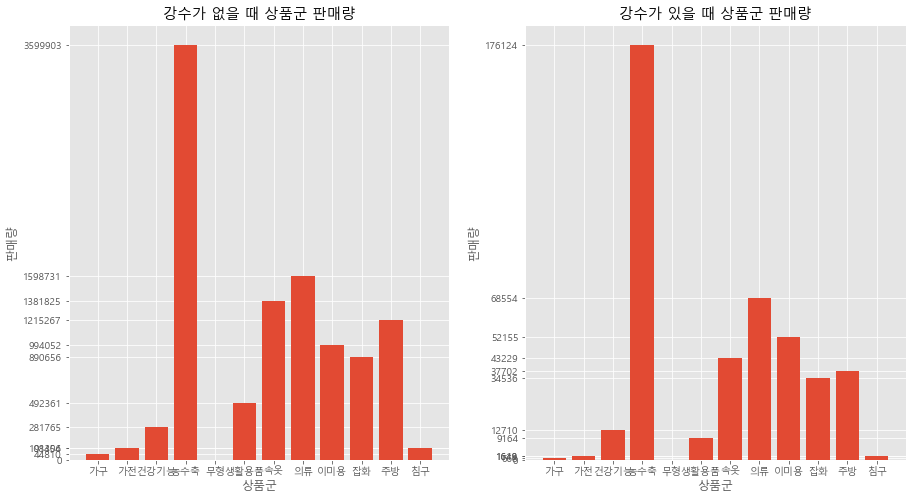

In [171]:
df4 = mer.groupby(['강수여부(분)','상품군'])['판매량'].agg([('sum', 'sum')]).reset_index()

x_f = df4[df4['강수여부(분)'] == False]['상품군']
y_f = df4[df4['강수여부(분)'] == False]['sum']
x_t = df4[df4['강수여부(분)'] == True]['상품군']
y_t = df4[df4['강수여부(분)'] == True]['sum']

plt.subplot(1,2,1)
plt.title("강수가 없을 때 상품군 판매량")
plt.bar(x_f, y_f)
plt.xticks(x_f)
plt.yticks(sorted(y_f))
plt.xlabel("상품군")
plt.ylabel("판매량")

plt.subplot(1,2,2)
plt.title("강수가 있을 때 상품군 판매량")
plt.bar(x_t, y_t)
plt.xticks(x_t)
plt.yticks(sorted(y_t))
plt.xlabel("상품군")
plt.ylabel("판매량")
plt.show()

In [172]:
rate_f = pd.DataFrame()
rate_f['상품군'] = x_f
rate_f['rate'] = round(y_f / sum(y_f) * 100,2)
rate_f.head()

,상품군,rate
0,가구,0.42
1,가전,0.92
2,건강기능,2.63
3,농수축,33.65
4,무형,0.00


In [173]:
rate_t = pd.DataFrame()
rate_t['상품군'] = x_t
rate_t['rate'] = round(y_t / sum(y_t) * 100,2)
rate_t.head()

,상품군,rate
12,가구,0.15
13,가전,0.37
14,건강기능,2.90
15,농수축,40.20
16,무형,0.00


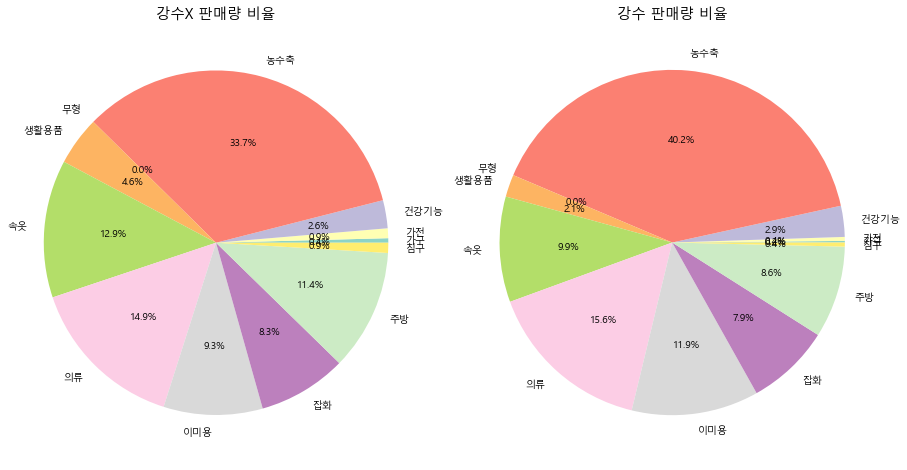

In [176]:
plt.subplot(1,2,1)
plt.pie(rate_f['rate'], labels=rate_f['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수X 판매량 비율")

plt.subplot(1,2,2)
plt.pie(rate_t['rate'], labels=rate_t['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수 판매량 비율")
plt.show()

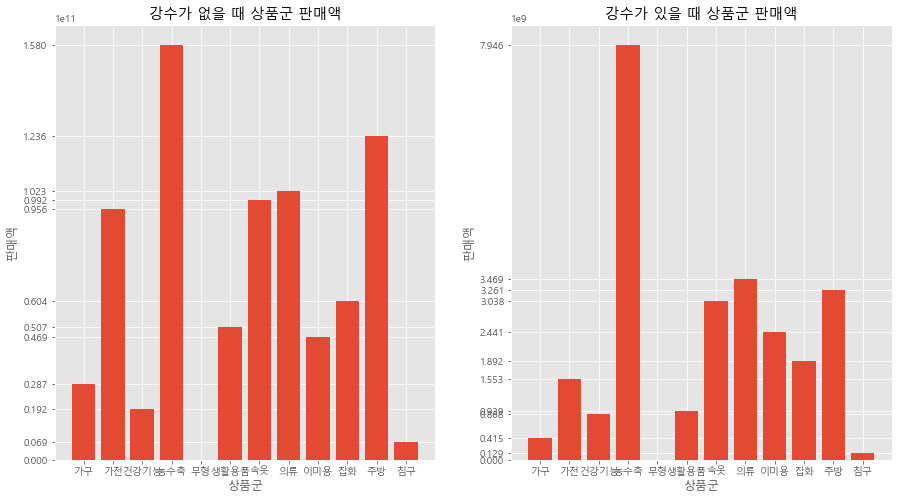

In [177]:
df4 = mer.groupby(['강수여부(분)','상품군'])['취급액'].agg([('sum', 'sum')]).reset_index()

x_f = df4[df4['강수여부(분)'] == False]['상품군']
y_f = df4[df4['강수여부(분)'] == False]['sum']

x_t = df4[df4['강수여부(분)'] == True]['상품군']
y_t = df4[df4['강수여부(분)'] == True]['sum']

plt.subplot(1,2,1)
plt.title("강수가 없을 때 상품군 판매액")
plt.bar(x_f, y_f)
plt.xticks(x_f)
plt.yticks(sorted(y_f))
plt.xlabel("상품군")
plt.ylabel("판매액")

plt.subplot(1,2,2)
plt.title("강수가 있을 때 상품군 판매액")
plt.bar(x_t, y_t)
plt.xticks(x_t)
plt.yticks(sorted(y_t))
plt.xlabel("상품군")
plt.ylabel("판매액")
plt.show()

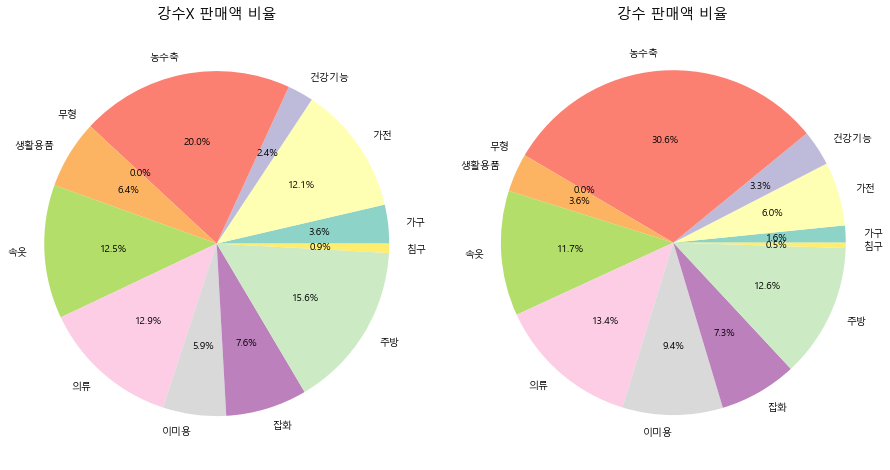

In [178]:
rate_f = pd.DataFrame()
rate_f['상품군'] = x_f
rate_f['rate'] = round(y_f / sum(y_f) * 100,2)
rate_f.head()

rate_t = pd.DataFrame()
rate_t['상품군'] = x_t
rate_t['rate'] = round(y_t / sum(y_t) * 100,2)
rate_t.head()

plt.subplot(1,2,1)
plt.pie(rate_f['rate'], labels=rate_f['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수X 판매액 비율")

plt.subplot(1,2,2)
plt.pie(rate_t['rate'], labels=rate_t['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수 판매액 비율")
plt.show()

해당 날짜에 비가 왔는지?

In [179]:
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,현지기압,해면기압,습도,일사,일조,분기,월,날짜,강수량,강수여부(분)
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,False
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,False
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,False
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,False
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0,False


In [183]:
mer1 = mer.copy()
mer1.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,현지기압,해면기압,습도,일사,일조,분기,월,날짜,강수량,강수여부(분)
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,False
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,False
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,False
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,False
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0,False


In [191]:
df5 = mer.groupby(['날짜'])['강수량'].agg([('강수량(일)', 'sum')]).reset_index()
df5['강수여부(일)'] = df5['강수량(일)'] != 0
df5.head()

,날짜,강수량(일),강수여부(일)
0,2019-01-01,0.0,False
1,2019-01-02,0.0,False
2,2019-01-03,0.0,False
3,2019-01-04,0.0,False
4,2019-01-05,0.0,False


In [193]:
mer1 = pd.merge(mer, df5, on='날짜')
mer1.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,습도,일사,일조,분기,월,날짜,강수량,강수여부(분),강수량(일),강수여부(일)
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,60.0,0.0,0.0,1,1,2019-01-01,0.0,False,0.0,False
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,60.0,0.0,0.0,1,1,2019-01-01,0.0,False,0.0,False
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,59.8,0.0,0.0,1,1,2019-01-01,0.0,False,0.0,False
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,59.8,0.0,0.0,1,1,2019-01-01,0.0,False,0.0,False
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,56.8,0.0,0.0,1,1,2019-01-01,0.0,False,0.0,False


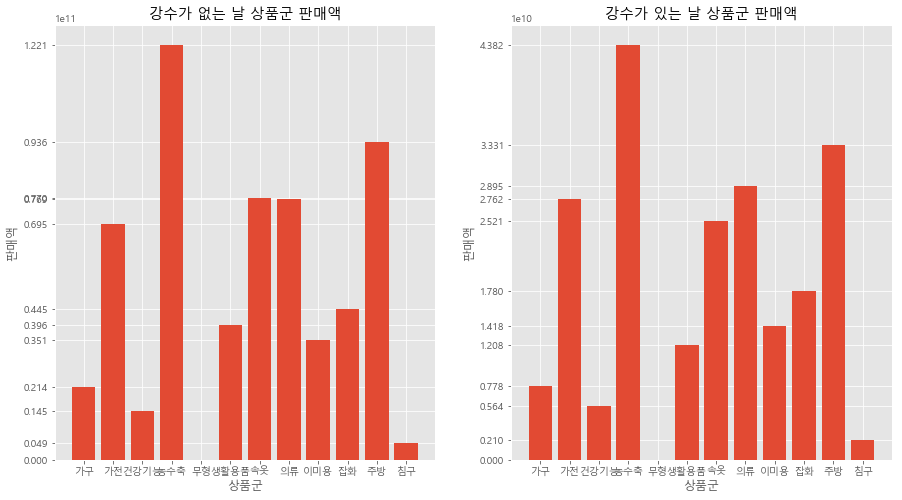

In [198]:
df4 = mer1.groupby(['강수여부(일)','상품군'])['취급액'].agg([('sum', 'sum')]).reset_index()

x_f = df4[df4['강수여부(일)'] == False]['상품군']
y_f = df4[df4['강수여부(일)'] == False]['sum']

x_t = df4[df4['강수여부(일)'] == True]['상품군']
y_t = df4[df4['강수여부(일)'] == True]['sum']

plt.subplot(1,2,1)
plt.title("강수가 없는 날 상품군 판매액")
plt.bar(x_f, y_f)
plt.xticks(x_f)
plt.yticks(sorted(y_f))
plt.xlabel("상품군")
plt.ylabel("판매액")

plt.subplot(1,2,2)
plt.title("강수가 있는 날 상품군 판매액")
plt.bar(x_t, y_t)
plt.xticks(x_t)
plt.yticks(sorted(y_t))
plt.xlabel("상품군")
plt.ylabel("판매액")
plt.show()

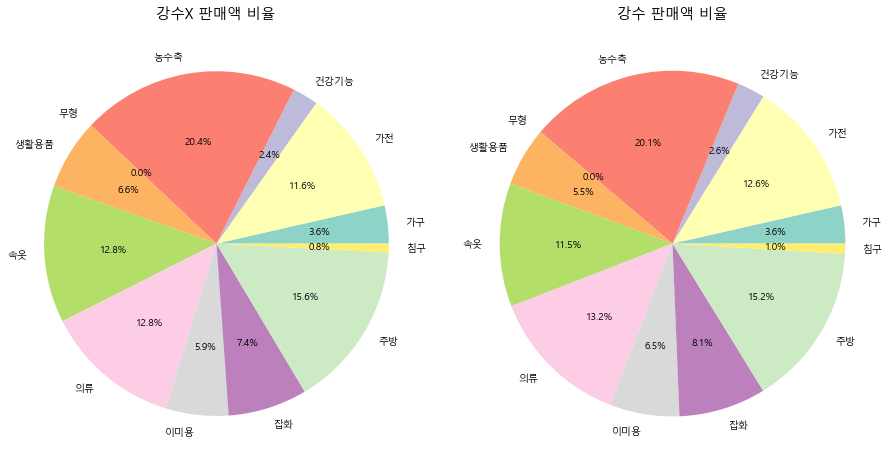

In [199]:
rate_f = pd.DataFrame()
rate_f['상품군'] = x_f
rate_f['rate'] = round(y_f / sum(y_f) * 100,2)
rate_f.head()

rate_t = pd.DataFrame()
rate_t['상품군'] = x_t
rate_t['rate'] = round(y_t / sum(y_t) * 100,2)
rate_t.head()

plt.subplot(1,2,1)
plt.pie(rate_f['rate'], labels=rate_f['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수X 판매액 비율")

plt.subplot(1,2,2)
plt.pie(rate_t['rate'], labels=rate_t['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수 판매액 비율")
plt.show()

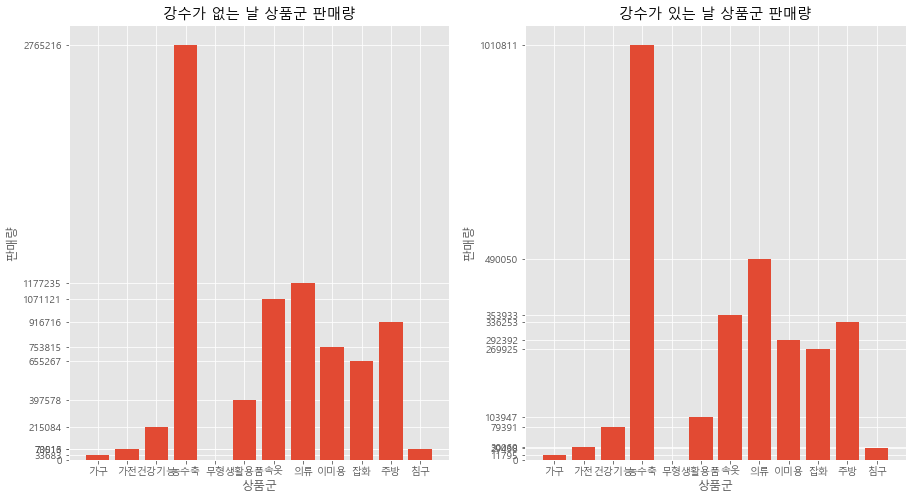

In [200]:
df4 = mer1.groupby(['강수여부(일)','상품군'])['판매량'].agg([('sum', 'sum')]).reset_index()

x_f = df4[df4['강수여부(일)'] == False]['상품군']
y_f = df4[df4['강수여부(일)'] == False]['sum']

x_t = df4[df4['강수여부(일)'] == True]['상품군']
y_t = df4[df4['강수여부(일)'] == True]['sum']

plt.subplot(1,2,1)
plt.title("강수가 없는 날 상품군 판매량")
plt.bar(x_f, y_f)
plt.xticks(x_f)
plt.yticks(sorted(y_f))
plt.xlabel("상품군")
plt.ylabel("판매량")

plt.subplot(1,2,2)
plt.title("강수가 있는 날 상품군 판매량")
plt.bar(x_t, y_t)
plt.xticks(x_t)
plt.yticks(sorted(y_t))
plt.xlabel("상품군")
plt.ylabel("판매량")
plt.show()

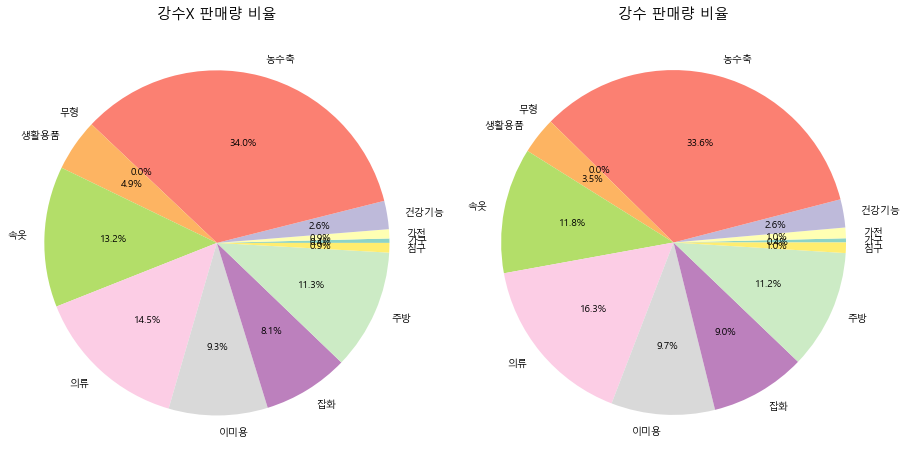

In [201]:
rate_f = pd.DataFrame()
rate_f['상품군'] = x_f
rate_f['rate'] = round(y_f / sum(y_f) * 100,2)
rate_f.head()

rate_t = pd.DataFrame()
rate_t['상품군'] = x_t
rate_t['rate'] = round(y_t / sum(y_t) * 100,2)
rate_t.head()

plt.subplot(1,2,1)
plt.pie(rate_f['rate'], labels=rate_f['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수X 판매량 비율")

plt.subplot(1,2,2)
plt.pie(rate_t['rate'], labels=rate_t['상품군'],
       autopct="%1.1f%%", colors=sns.color_palette("Set3", len(rate_f)))
plt.axis('equal')
plt.title("강수 판매량 비율")
plt.show()

#### 2. 온도

In [49]:
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,현지기압,해면기압,습도,일사,일조,분기,월,날짜,강수량,강수여부(분)
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,53.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,True
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,110.0,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,True
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,82.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,True
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.0,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,True
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.0,True,...,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0,True


In [50]:
df3 = mer.groupby('기온')['취급액'].agg([('sum', 'sum')]).reset_index()
df3.head()

,기온,sum
0,-10.8,94872000.0
1,-10.7,68543000.0
2,-10.6,81636000.0
3,-10.4,38722000.0
4,-10.3,62815000.0


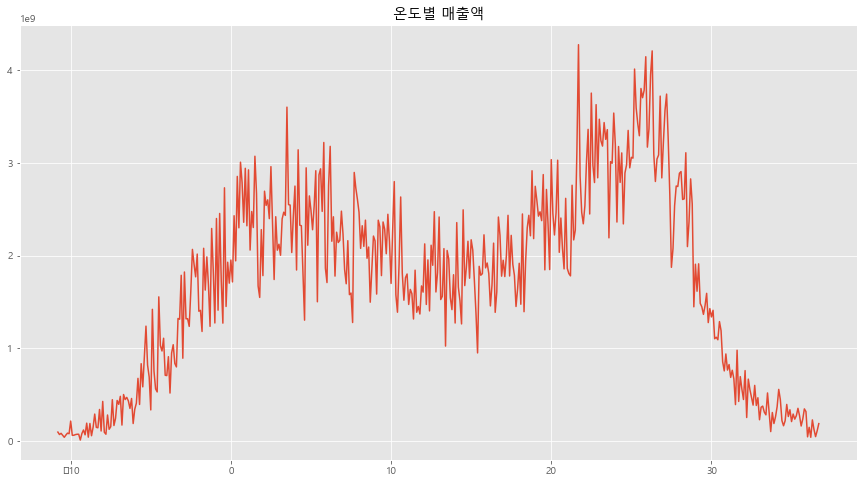

In [56]:
plt.title("온도별 매출액")
plt.plot(df3['기온'], df3['sum'])
plt.show()

In [57]:
# 판매량
mer['판매량'] = mer['취급액'] / mer['판매단가']
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,현지기압,해면기압,습도,일사,일조,분기,월,날짜,강수량,강수여부(분)
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,True
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872,True,...,1023.6,1034.9,60.0,0.0,0.0,1,1,2019-01-01,0.0,True
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,True
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777,True,...,1023.6,1034.9,59.8,0.0,0.0,1,1,2019-01-01,0.0,True
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045,True,...,1023.3,1034.6,56.8,0.0,0.0,1,1,2019-01-01,0.0,True


In [58]:
df3_1 = mer.groupby('기온')['판매량'].agg([('sum', 'sum')]).reset_index()
df3_1.head()

,기온,sum
0,-10.8,1532.185969
1,-10.7,1398.836735
2,-10.6,1852.667383
3,-10.4,970.476190
4,-10.3,656.671263


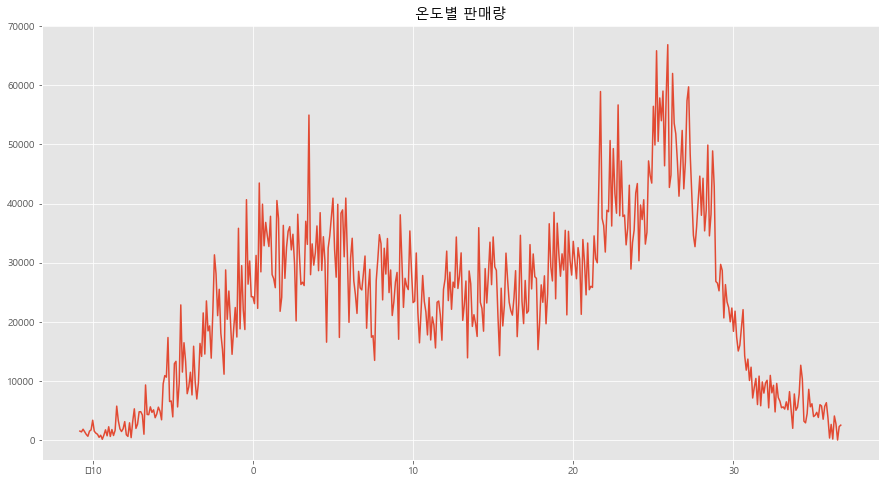

In [118]:
plt.title("온도별 판매량")
plt.plot(df3_1['기온'], df3_1['sum'])
plt.show()

In [ ]:
# 반올림
# 전체 기간 동안 제일 많이 방영했던 상품
# 전체 기간 동안 많이 팔린 상품
# 습도에 따른 어떤 상품군?
# 미세먼지에 따른 상품군?

#### 3. 온도별 어떤 상품군?

- 반올림

In [104]:
mer['기온반올림'] =  round(mer['기온'],0)
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,습도,일사,일조,분기,월,날짜,강수량,강수여부(분),기온반올림,기온구간
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516,True,...,60.0,0.0,0.0,1,1,2019-01-01,0.0,True,-8.0,"(-10.849, -6.05]"
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872,True,...,60.0,0.0,0.0,1,1,2019-01-01,0.0,True,-8.0,"(-10.849, -6.05]"
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386,True,...,59.8,0.0,0.0,1,1,2019-01-01,0.0,True,-8.0,"(-10.849, -6.05]"
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777,True,...,59.8,0.0,0.0,1,1,2019-01-01,0.0,True,-8.0,"(-10.849, -6.05]"
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045,True,...,56.8,0.0,0.0,1,1,2019-01-01,0.0,True,-8.0,"(-10.849, -6.05]"


In [105]:
mer.기온반올림.describe()

count    4246.000000
mean       13.208667
std        11.779193
min       -11.000000
25%         3.000000
50%        13.500000
75%        23.000000
max        37.000000
Name: 기온, dtype: float64

In [106]:
df444 = mer.groupby(['기온반올림','상품군'])['취급액'].agg([('sum', 'sum')]).reset_index()
df444.head()

,기온반올림,상품군,sum
0,-11.0,건강기능,40096000.0
1,-11.0,의류,41540000.0
2,-11.0,잡화,82617000.0
3,-11.0,주방,80798000.0
4,-10.0,건강기능,63147000.0


온도별 상품군 판매액


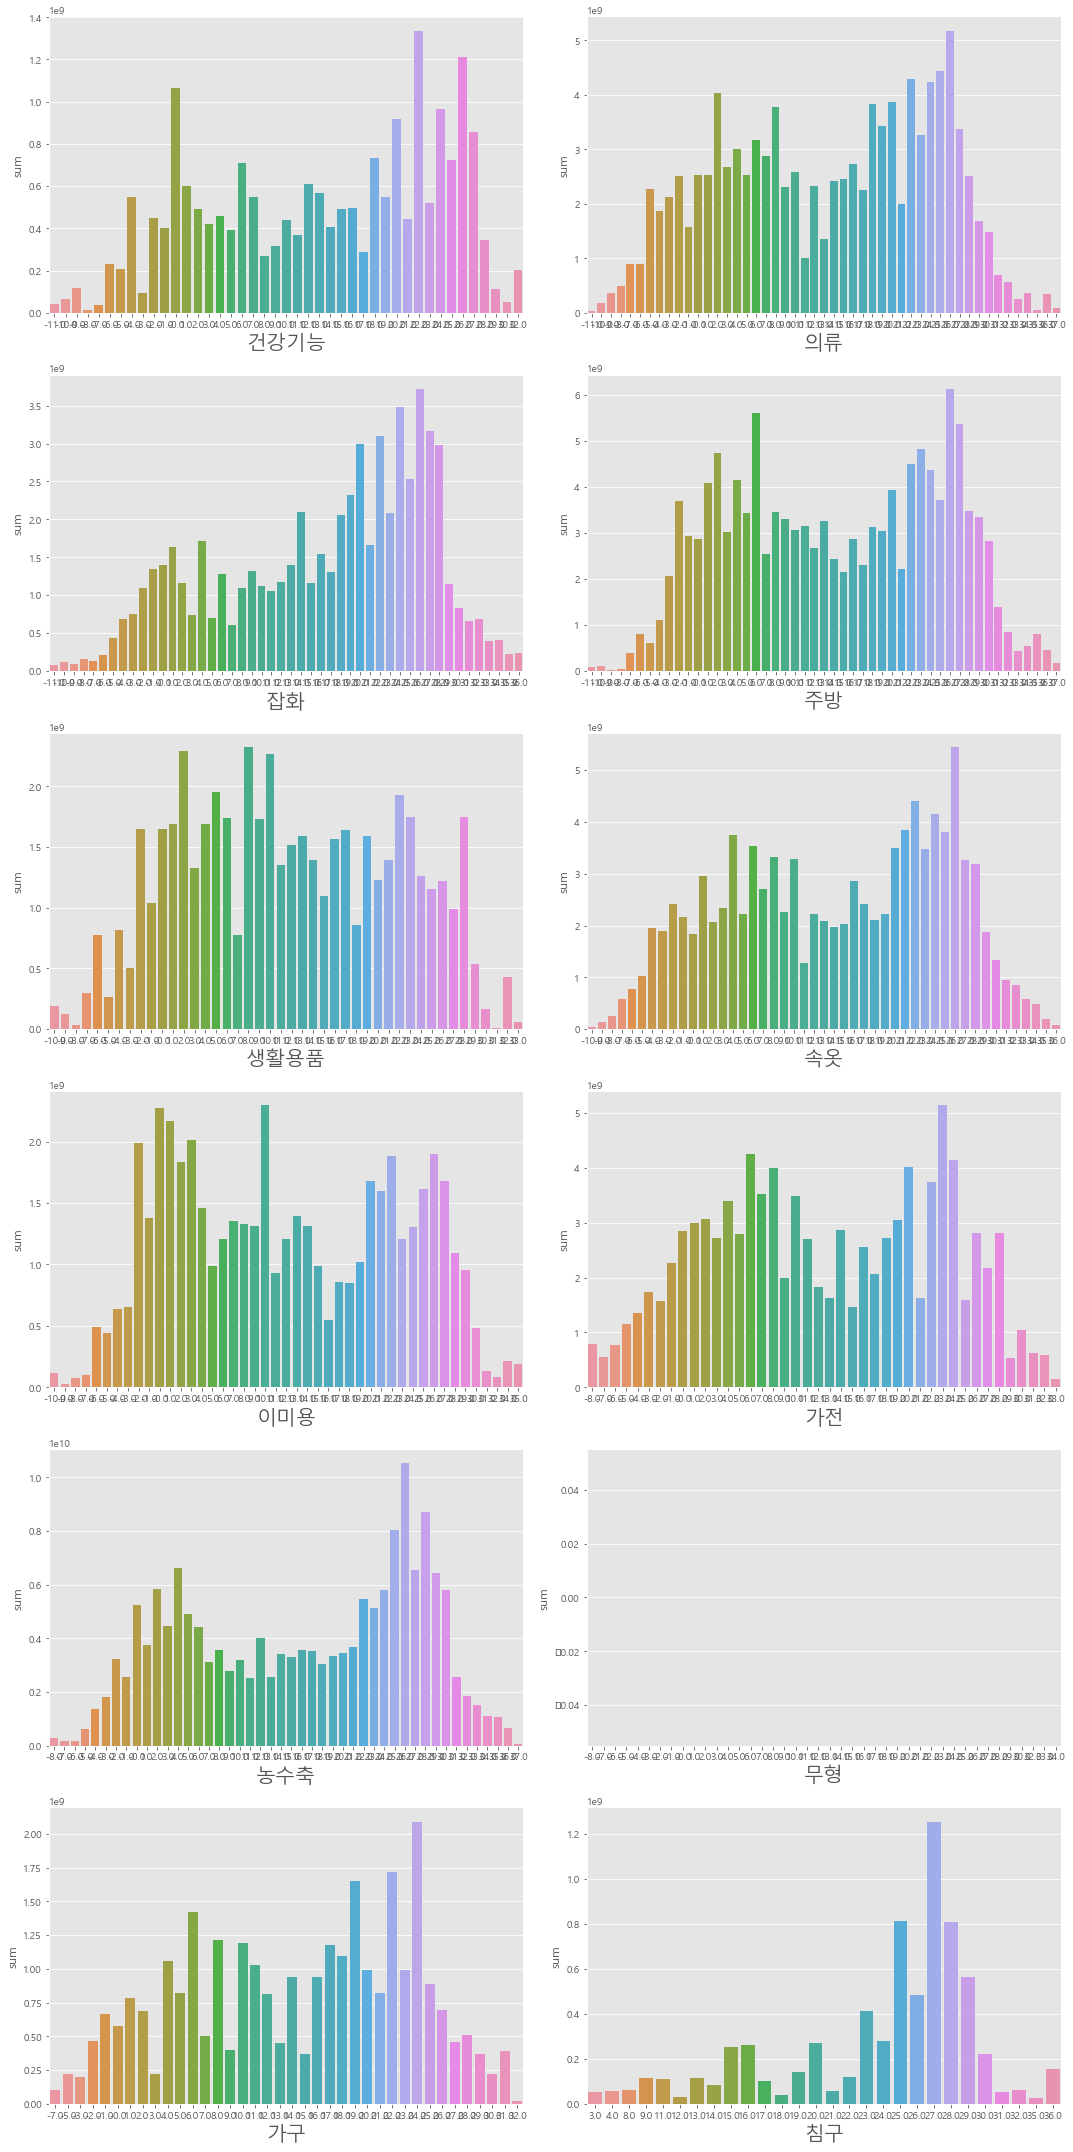

In [109]:
fig,axs = plt.subplots(figsize=(15,30),nrows=6,ncols=2)
fig.tight_layout()

print('온도별 상품군 판매액')
mer_list = df444['상품군'].unique()
for i,name in enumerate(mer_list):
    data = df444[df444['상품군']==name]
    row = int(i/2)
    col = i%2
    sns.barplot(x='기온반올림',y='sum',data=data, ax=axs[row][col])
    axs[row][col].set_xlabel(name, size=20)
fig.tight_layout()
plt.show()

온도별 상품군 판매량


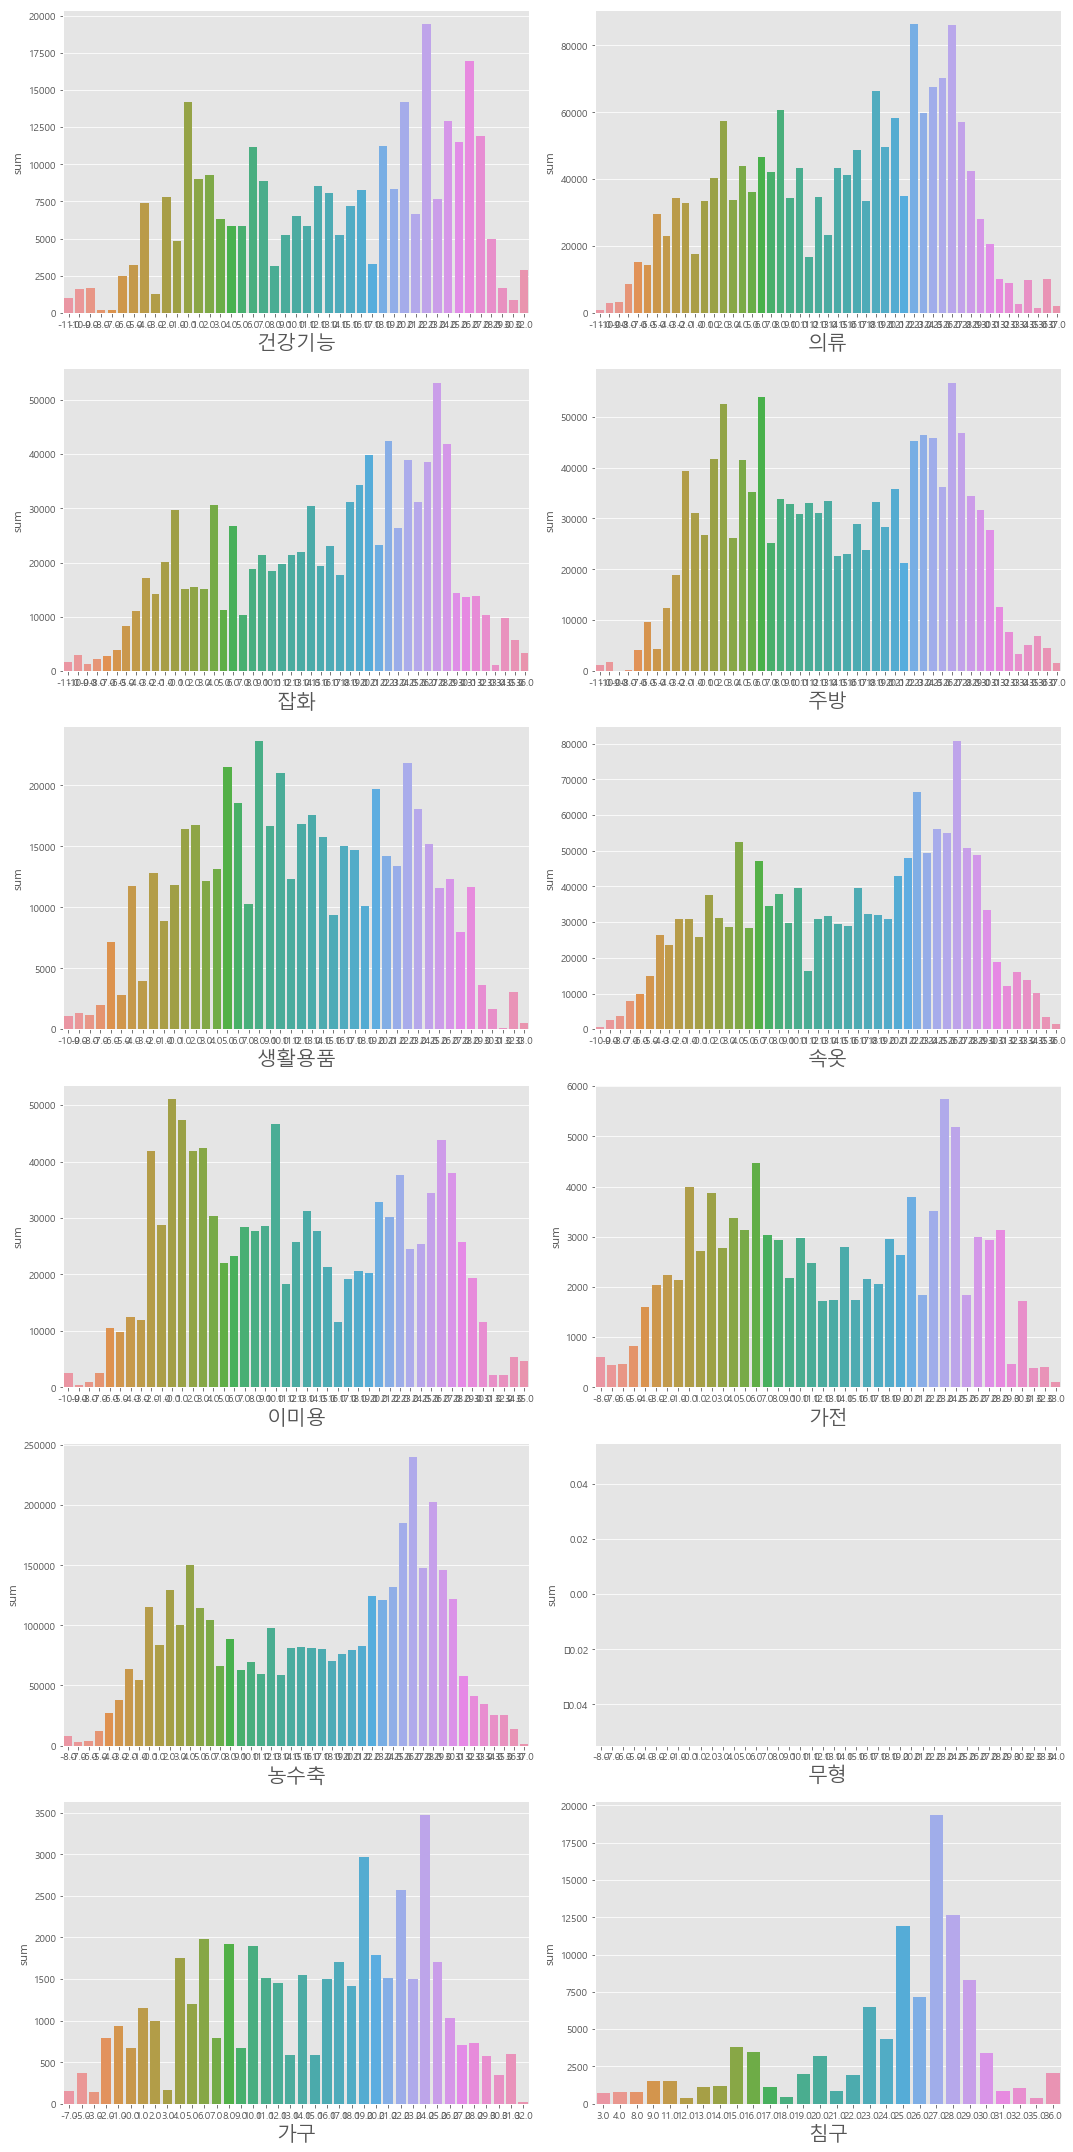

In [110]:
df444 = mer.groupby(['기온반올림','상품군'])['판매량'].agg([('sum', 'sum')]).reset_index()

fig,axs = plt.subplots(figsize=(15,30),nrows=6,ncols=2)
fig.tight_layout()

print('온도별 상품군 판매량')
mer_list = df444['상품군'].unique()
for i,name in enumerate(mer_list):
    data = df444[df444['상품군']==name]
    row = int(i/2)
    col = i%2
    sns.barplot(x='기온반올림',y='sum',data=data, ax=axs[row][col])
    axs[row][col].set_xlabel(name, size=20)
fig.tight_layout()
plt.show()

- 구간

In [73]:
mer['기온구간'] = pd.cut(mer['기온'], bins = 10, include_lowest=True)
mer.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,판매량,holiday,...,습도,일사,일조,분기,월,날짜,강수량,강수여부(분),기온반올림,기온구간
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516,True,...,60.0,0.0,0.0,1,1,2019-01-01,0.0,True,-11.0,"(-10.849, -6.05]"
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872,True,...,60.0,0.0,0.0,1,1,2019-01-01,0.0,True,-11.0,"(-10.849, -6.05]"
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386,True,...,59.8,0.0,0.0,1,1,2019-01-01,0.0,True,-11.0,"(-10.849, -6.05]"
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777,True,...,59.8,0.0,0.0,1,1,2019-01-01,0.0,True,-11.0,"(-10.849, -6.05]"
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045,True,...,56.8,0.0,0.0,1,1,2019-01-01,0.0,True,-11.0,"(-10.849, -6.05]"


In [74]:
df44 = mer.groupby(['기온구간','상품군'])['취급액'].agg([('sum', 'sum')]).reset_index()
df44.head()

,기온구간,상품군,sum
0,"(-10.849, -6.05]",가구,1.023600e+08
1,"(-10.849, -6.05]",가전,1.571972e+09
2,"(-10.849, -6.05]",건강기능,3.681590e+08
3,"(-10.849, -6.05]",농수축,4.921620e+08
4,"(-10.849, -6.05]",무형,0.000000e+00


온도별 상품군 판매액


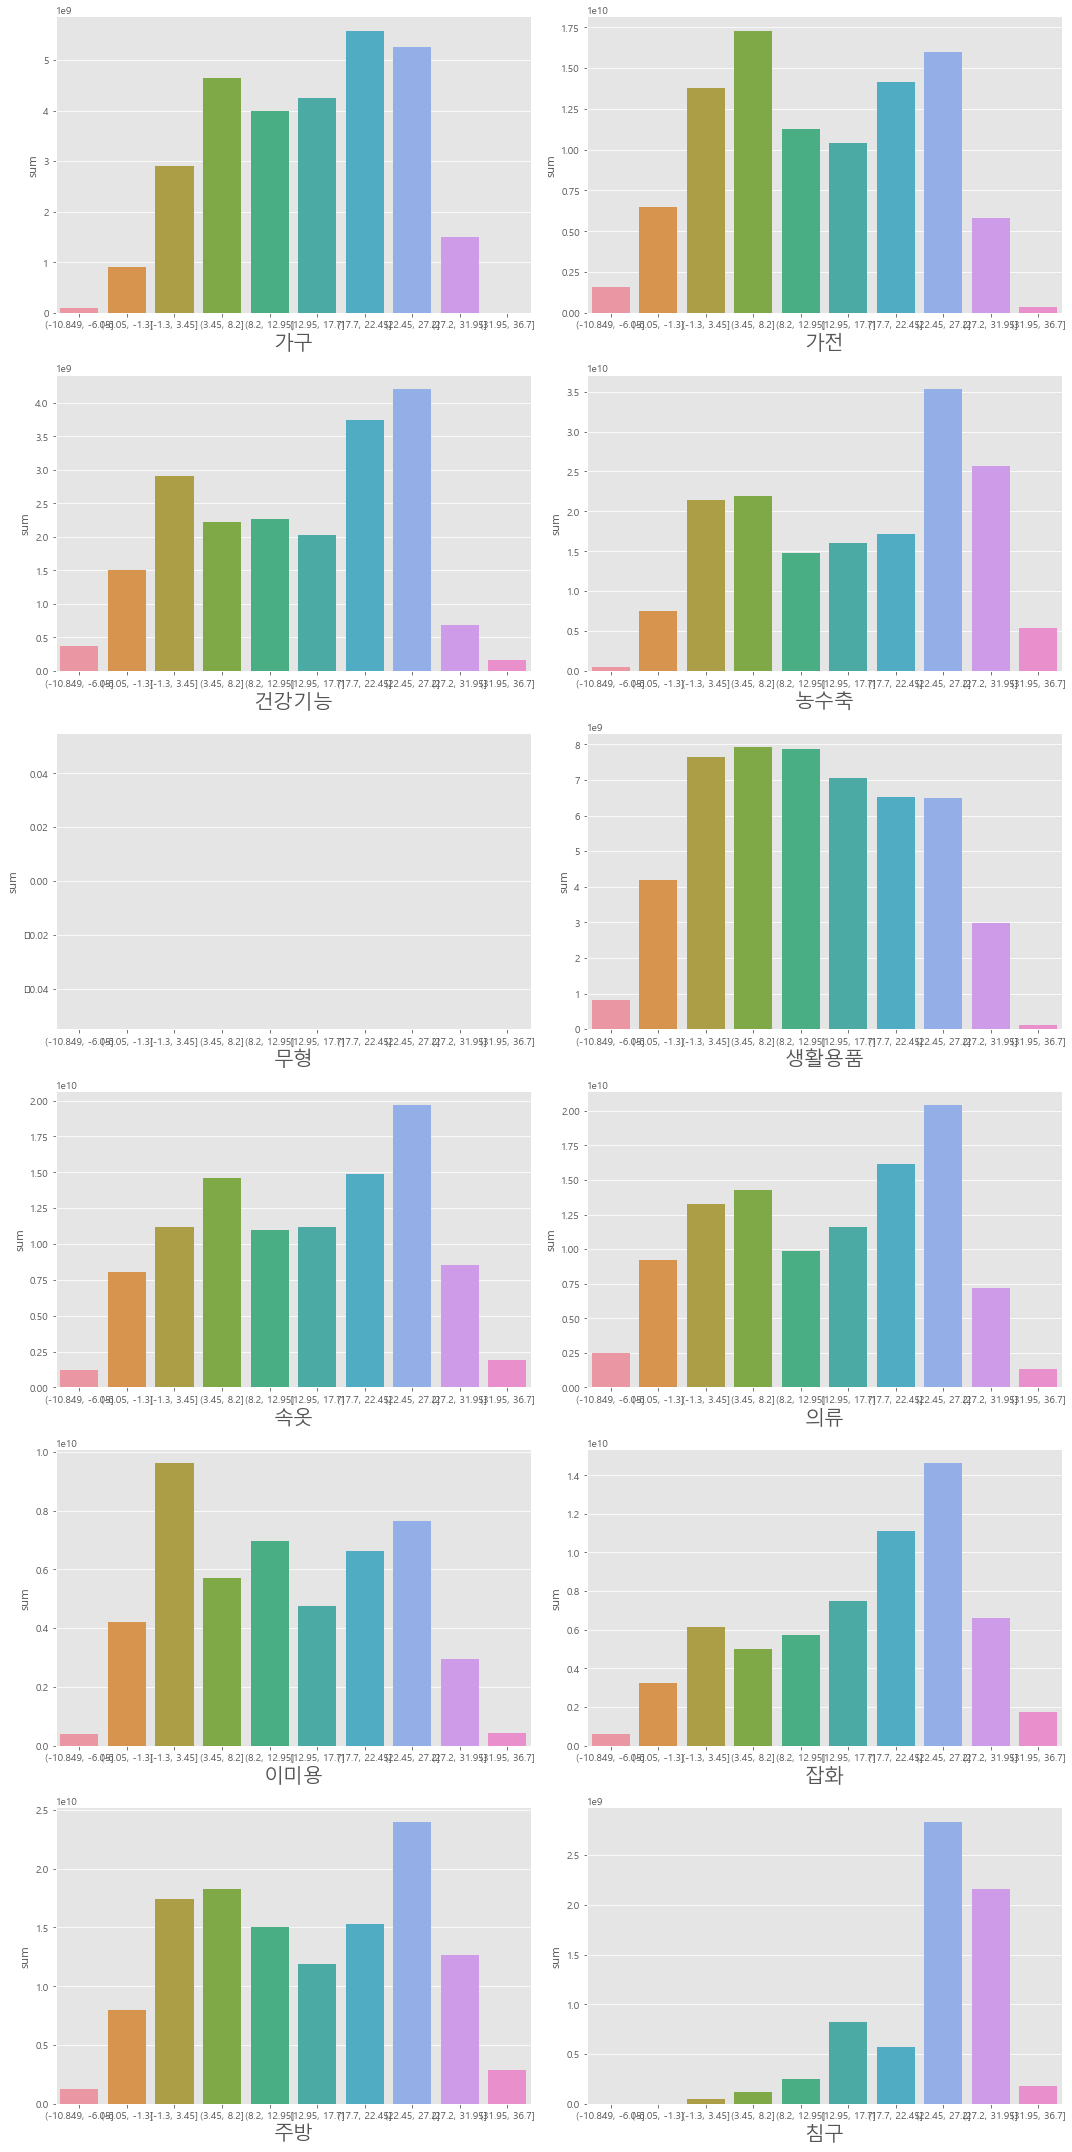

In [111]:

fig,axs = plt.subplots(figsize=(15,30),nrows=6,ncols=2)
fig.tight_layout()

print('온도별 상품군 판매액')
mer_list = df44['상품군'].unique()
for i,name in enumerate(mer_list):
    data = df44[df44['상품군']==name]
    row = int(i/2)
    col = i%2
    sns.barplot(x='기온구간',y='sum',data=data, ax=axs[row][col])
    axs[row][col].set_xlabel(name, size=20)
fig.tight_layout()
plt.show()

온도별 상품군 판매량


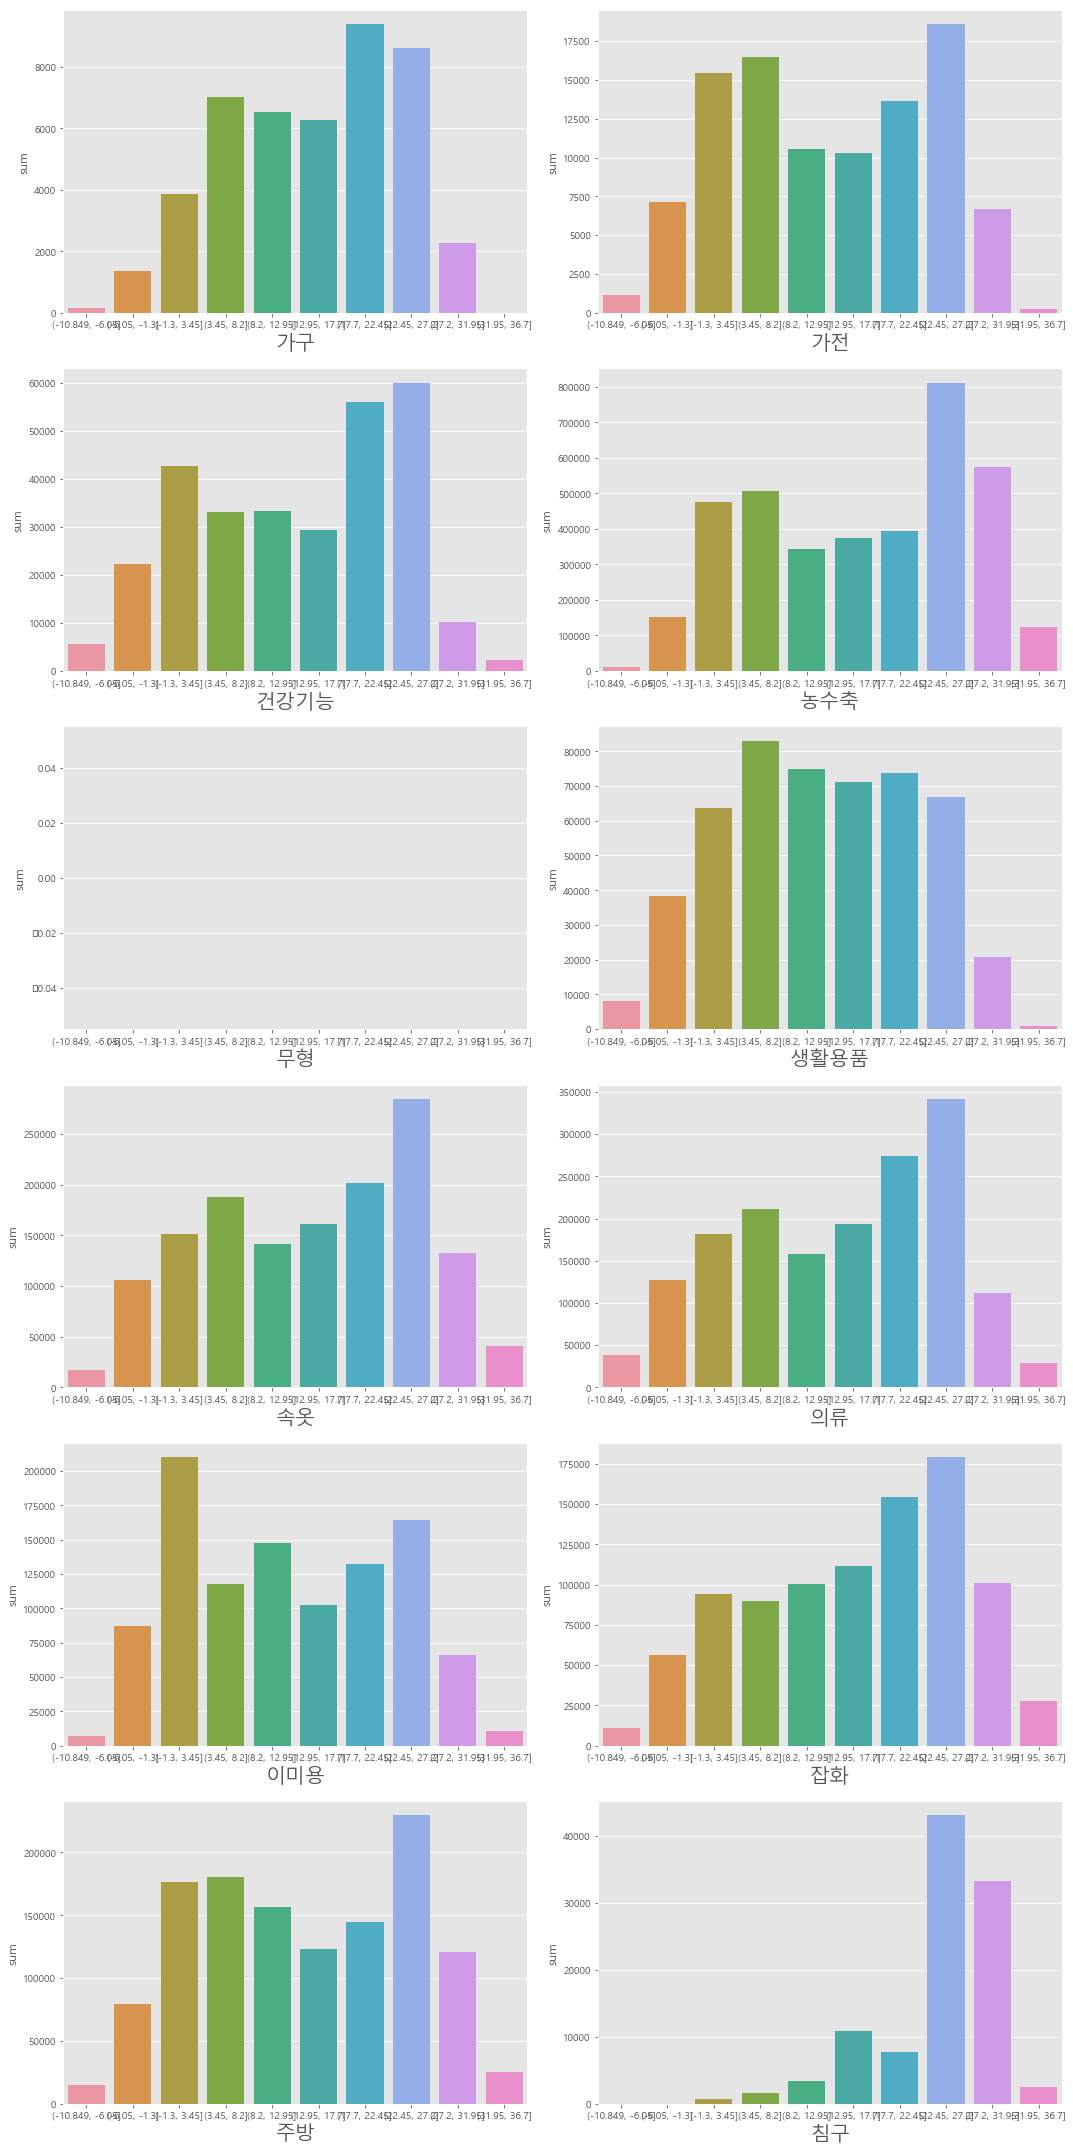

In [112]:
matplotlib.rcParams['axes.unicode_minus'] = False
df44 = mer.groupby(['기온구간','상품군'])['판매량'].agg([('sum', 'sum')]).reset_index()

fig,axs = plt.subplots(figsize=(15,30),nrows=6,ncols=2)
fig.tight_layout()

mer_list = df44['상품군'].unique()
print('온도별 상품군 판매량')
for i,name in enumerate(mer_list):
    data = df44[df44['상품군']==name]
    row = int(i/2)
    col = i%2
    sns.barplot(x='기온구간',y='sum',data=data, ax=axs[row][col])
    axs[row][col].set_xlabel(name, size=20)
fig.tight_layout()
plt.show()

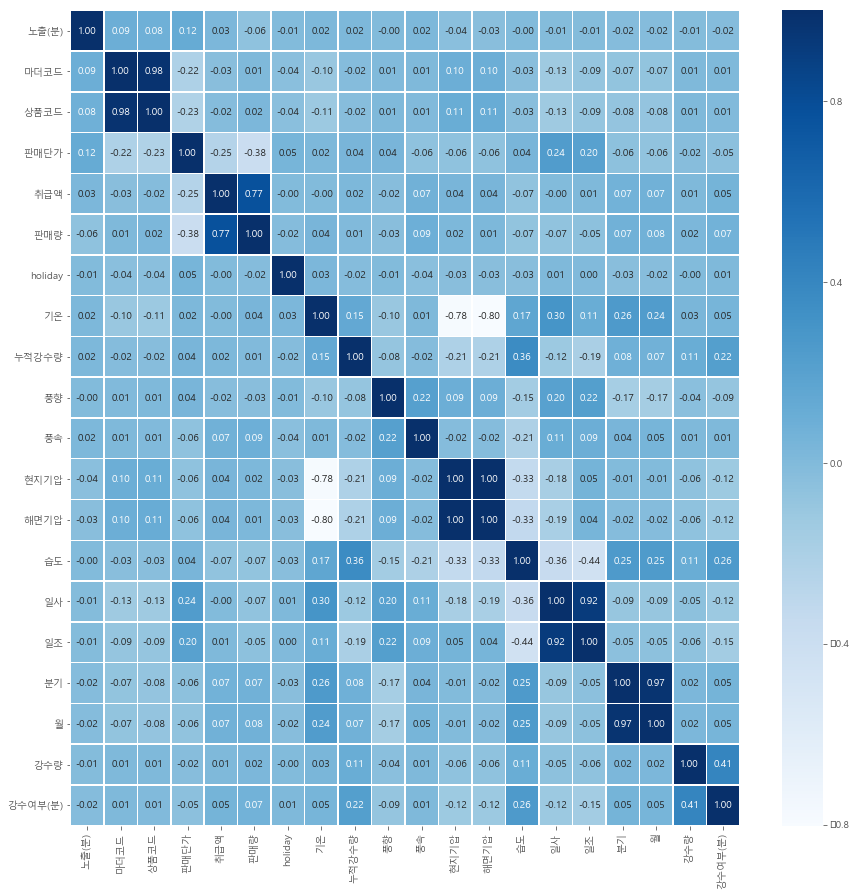

In [220]:
plt.figure(figsize=(15,15))
sns.heatmap(data = mer.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')